## imports

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



LAND_DF_DIRECTORY = r'C:\Users\ydjoe\Documents\solar rad stats\land_data\Dublin_land_solar_radiation_{}.csv'

SAT_DF_DIRECTORY = r'C:\Users\ydjoe\Documents\solar rad stats\surface_solar_radiation_downwards\Dublin_sat_solar_radiation_{}.csv'

## Taking mean of the day

In [3]:
data_year = ['2014','2015','2016','2017','2018','2019','2020']
ls_land_dfs = []
ls_sat_dfs = []

for i in data_year:  
    df_land = pd.read_csv(LAND_DF_DIRECTORY.format(i),index_col = 0)
    sat_df = pd.read_csv(SAT_DF_DIRECTORY.format(i),index_col = 0)
    df_land = df_land.rename(columns={'[W/m2]': 'Val'})    
    sat_solar_rad = sat_df['Val'].to_list()
    land_solar_rad = df_land['Val'].to_list()

    ls_init_vals = [sat_solar_rad,land_solar_rad]
    ls_init_dfs = [sat_df,df_land]
    ls_dfs = []
    ls_final_vals = []

    for j in range(2):

        new_df = ls_init_dfs[j].copy()
        new_df['solar_diff'] = ls_init_vals[j]
        new_df = new_df.drop(new_df.columns[4],axis=1)

        solar_diff_hour_df = new_df[new_df.Hour==12]
        solar_diff_hour_df = solar_diff_hour_df.drop(solar_diff_hour_df.columns[3],axis=1)
        solar_diff_hour_df.reset_index(drop=True, inplace=True)

        solar_diff_mean_lst = new_df.groupby(['Month','Day'])['solar_diff'].mean().to_list()
        solar_diff_hour_df['solar_diff'] = solar_diff_mean_lst

        ls_dfs.append(solar_diff_hour_df)

    ls_sat_dfs.append(ls_dfs[0])
    ls_land_dfs.append(ls_dfs[1])
    

df_land_daily = pd.concat(ls_land_dfs)
df_sat_daily = pd.concat(ls_sat_dfs)
df_land_daily = df_land_daily.rename(columns={'solar_diff': 'Val'})
df_sat_daily = df_sat_daily.rename(columns={'solar_diff': 'Val'})



## all data

In [4]:
data_year = ['2014','2015','2016','2017','2018','2019','2020']
ls_land_dfs = []
ls_sat_dfs = []

for i in data_year:  
    df_land = pd.read_csv(LAND_DF_DIRECTORY.format(i),index_col = 0)
    sat_df = pd.read_csv(SAT_DF_DIRECTORY.format(i),index_col = 0)
    df_land = df_land.rename(columns={'[W/m2]': 'Val'})    

    ls_sat_dfs.append(sat_df)
    ls_land_dfs.append(df_land)
    

df_land_hourly = pd.concat(ls_land_dfs)
df_sat_hourly = pd.concat(ls_sat_dfs)
df_land_hourly = df_land_hourly.rename(columns={'solar_diff': 'Val'})
df_sat_hourly = df_sat_hourly.rename(columns={'solar_diff': 'Val'})
df_sat_hourly['Val'] = df_sat_hourly['Val'].shift(-2)
df_sat_hourly = df_sat_hourly.fillna(0)

### number of values for each year

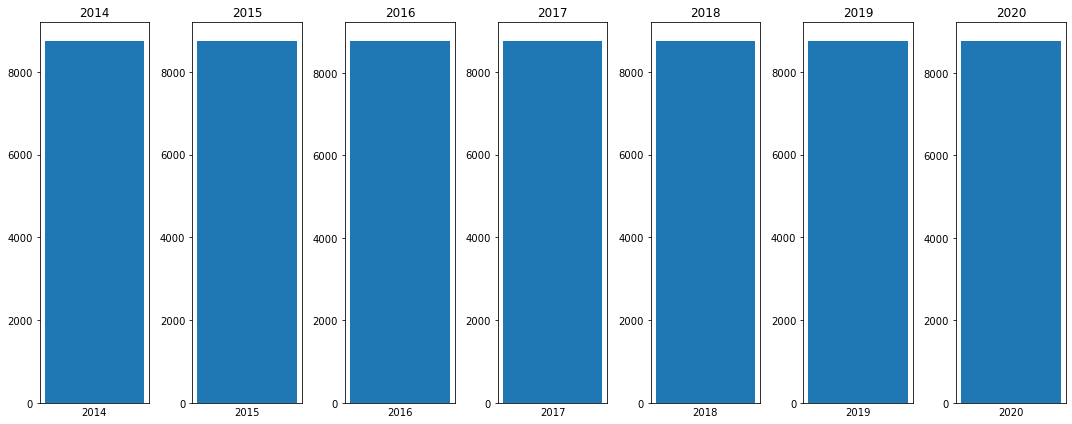

In [6]:
years = df_sat_hourly.Year.unique()
fig, axs = plt.subplots(1,len(years), figsize=(15, 6), facecolor='w', edgecolor='k')
for i in range(len(years)):
    ax = axs[i]
    #len(df_sat_hourly[df_sat_hourly.Year==years[i]]).plot(kind='barh')
    ax.bar(years[i],len(df_sat_hourly[df_sat_hourly.Year==years[i]]['Val']))
    ax.set_xlabel(years[i])     
    ax.set_title(years[i])
    ax.set_xticks([])
plt.tight_layout()
# plt.rcParams.update({'font.size': 20})
plt.savefig('plots/p1.pdf', bbox_inches = 'tight')


## Null Values

In [7]:
df_sat_hourly.isna().sum()

Year     0
Month    0
Day      0
Hour     0
Val      0
dtype: int64

## adding date column

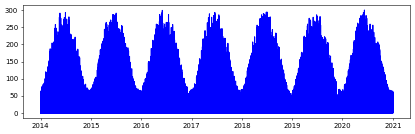

In [8]:
tdf_sat_hourly = df_sat_hourly.copy()
tdf_sat_hourly['Date'] = pd.to_datetime(tdf_sat_hourly[["Year", "Month", "Day","Hour"]])
tdf_sat_hourly.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,3), dpi=50)
plt.plot(tdf_sat_hourly['Date'],tdf_sat_hourly['Val'],color='blue')

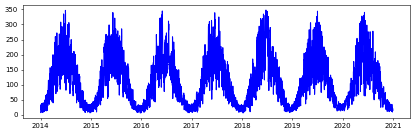

In [9]:
tdf_land_daily = df_land_daily.copy()
tdf_land_daily['Date'] = pd.to_datetime(tdf_land_daily[["Year", "Month", "Day"]])
tdf_land_daily.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,3), dpi=50)
plt.plot(tdf_land_daily['Date'],tdf_land_daily['Val'],color='blue')

In [10]:
print(tdf_land_daily.shape)
print(tdf_sat_hourly.shape)

(2557, 5)
(61368, 6)


## plot 0 in an hour

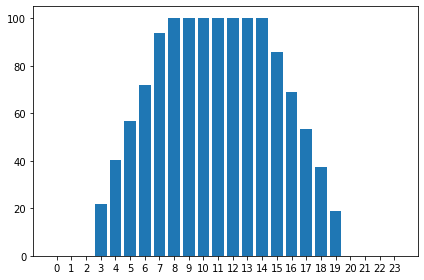

In [11]:
hours = tdf_sat_hourly.Hour.unique()

ar_x = []
ar_y = []
for i in range(len(hours)):

    ar_x.append(hours[i])
    ar_y.append(len(tdf_sat_hourly.loc[(tdf_sat_hourly.Hour==i) & (tdf_sat_hourly.Val!=0)])/len(tdf_sat_hourly.loc[(tdf_sat_hourly.Hour==i)])*100)

plt.xticks(ar_x)
plt.bar(ar_x,ar_y)
plt.tight_layout()
plt.savefig('plots/p2.pdf')

## plot 0 in month and hour

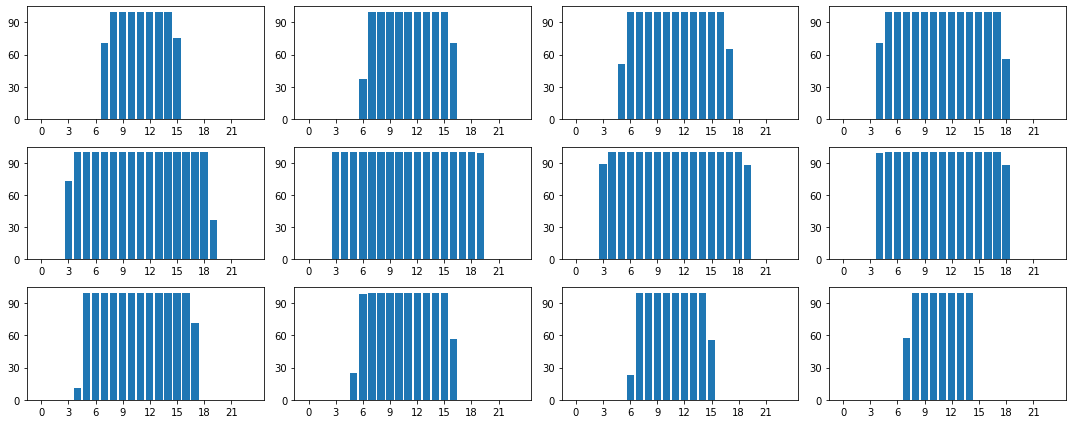

In [12]:
hours = tdf_sat_hourly.Hour.unique()
months = tdf_sat_hourly.Month.unique()

fig, axs = plt.subplots(3,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
c = 0
for j in months:
    ar_x = []
    ar_y = []
    for i in range(len(hours)):
        ar_x.append(hours[i])
        df_mon_hr = tdf_sat_hourly.loc[(tdf_sat_hourly.Hour==i) & (tdf_sat_hourly.Month==j)]
        y_val = len(df_mon_hr.loc[tdf_sat_hourly.Val!=0])/len(df_mon_hr)*100
        ar_y.append(y_val)

    axs[c].set_xticks(np.arange(min(ar_x), max(ar_x)+1, 3.0))
    axs[c].set_yticks(np.arange(min(ar_y), max(ar_y)+1, 30))
    axs[c].bar(ar_x,ar_y)   
    c+=1
plt.tight_layout()
plt.savefig('plots/p3.pdf')
    

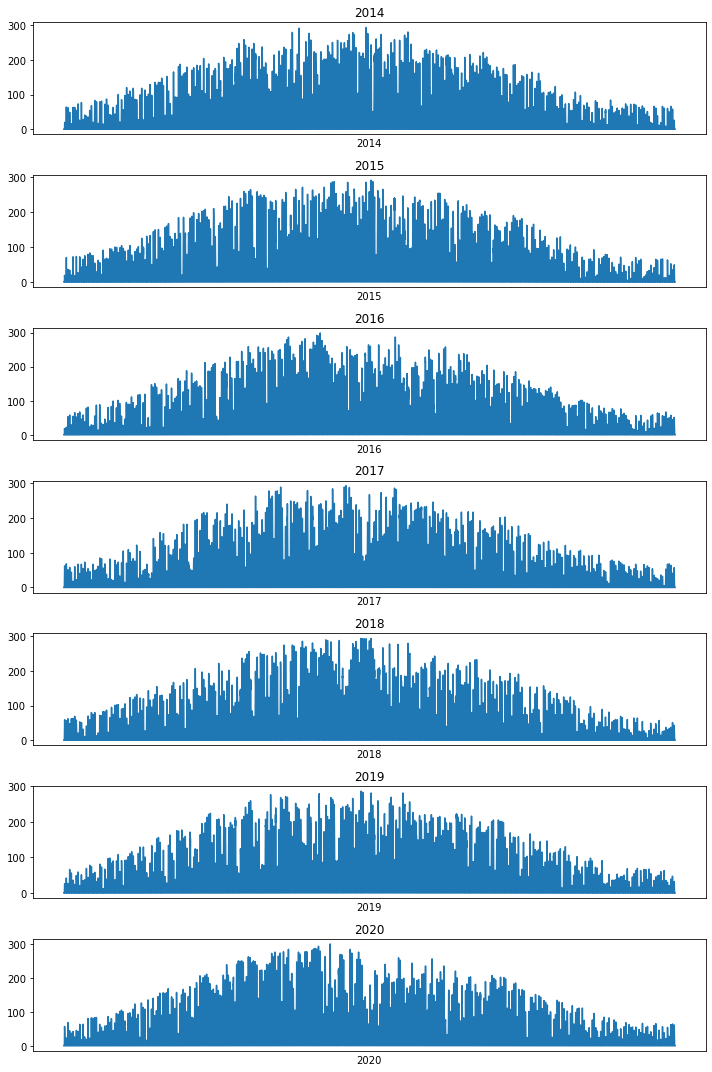

In [13]:
years = tdf_sat_hourly.Year.unique()
fig, axs = plt.subplots(len(years), figsize=(10,15), facecolor='w', edgecolor='k')
for i in range(len(years)):
    ax = axs[i]
    ax.plot((tdf_sat_hourly[tdf_sat_hourly.Year==years[i]]['Date']),(tdf_sat_hourly[tdf_sat_hourly.Year==years[i]]['Val']))
    ax.set_xlabel(years[i])     
    ax.set_title(years[i])
    ax.set_xticks([])
plt.tight_layout()

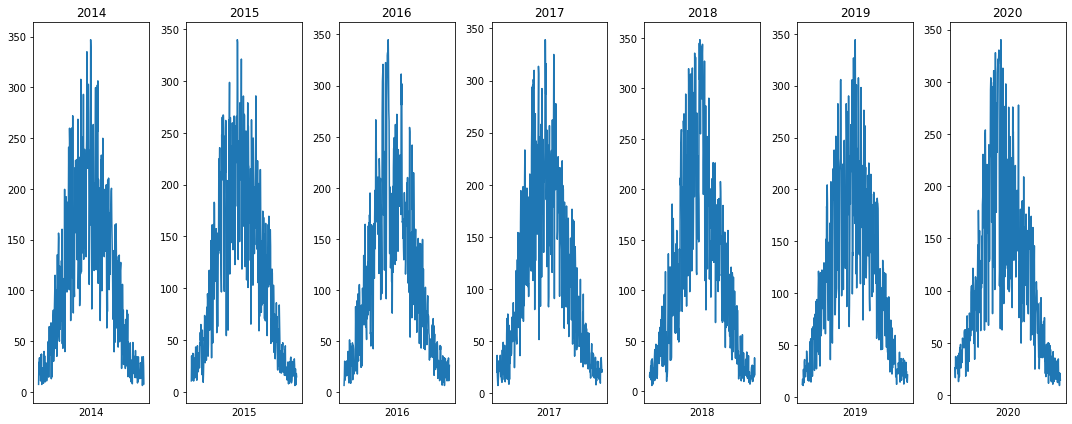

In [14]:
years = tdf_land_daily.Year.unique()
fig, axs = plt.subplots(1,len(years), figsize=(15, 6), facecolor='w', edgecolor='k')
for i in range(len(years)):
    ax = axs[i]
    ax.plot((tdf_land_daily[tdf_land_daily.Year==years[i]]['Date']),(tdf_land_daily[tdf_land_daily.Year==years[i]]['Val']))
    ax.set_xlabel(years[i])     
    ax.set_title(years[i])
    ax.set_xticks([])
plt.tight_layout()

## removing zeros

In [15]:
hours = tdf_sat_hourly.Hour.unique()
months = tdf_sat_hourly.Month.unique()

c = 0
a_x = {}
for j in months:
    ar_x = []
    ar_y = []
    a_y = []
    for i in range(len(hours)):
        ar_x.append(hours[i])
        df_mon_hr = tdf_sat_hourly.loc[(tdf_sat_hourly.Hour==i) & (tdf_sat_hourly.Month==j)]
        y_val = len(df_mon_hr.loc[tdf_sat_hourly.Val!=0])/len(df_mon_hr)*100
        if y_val<50:
            a_y.append(i)
            c+=1

    a_x[j] = a_y

print(c)

df = tdf_sat_hourly.copy()

for i in a_x.keys():
    del_hours = a_x[i] 
    idx_to_del = df[(df.Month==i)][df[(df.Month==i)]['Hour'].isin(del_hours)].index.to_list()
    df = df.drop(idx_to_del)


135


In [16]:
a_x

{1: [0, 1, 2, 3, 4, 5, 6, 16, 17, 18, 19, 20, 21, 22, 23],
 2: [0, 1, 2, 3, 4, 5, 6, 17, 18, 19, 20, 21, 22, 23],
 3: [0, 1, 2, 3, 4, 18, 19, 20, 21, 22, 23],
 4: [0, 1, 2, 3, 19, 20, 21, 22, 23],
 5: [0, 1, 2, 19, 20, 21, 22, 23],
 6: [0, 1, 2, 20, 21, 22, 23],
 7: [0, 1, 2, 20, 21, 22, 23],
 8: [0, 1, 2, 3, 19, 20, 21, 22, 23],
 9: [0, 1, 2, 3, 4, 18, 19, 20, 21, 22, 23],
 10: [0, 1, 2, 3, 4, 5, 17, 18, 19, 20, 21, 22, 23],
 11: [0, 1, 2, 3, 4, 5, 6, 16, 17, 18, 19, 20, 21, 22, 23],
 12: [0, 1, 2, 3, 4, 5, 6, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

## verification

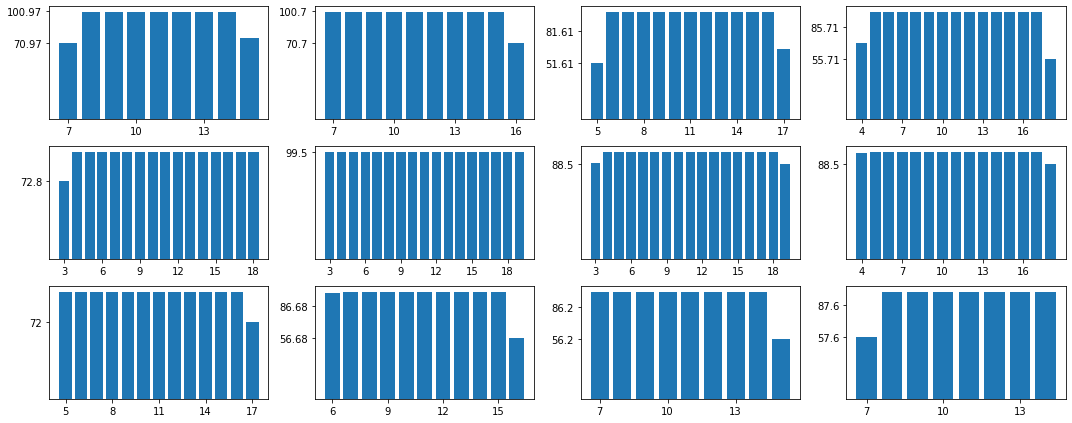

In [17]:
hours = df.Hour.unique()
months = df.Month.unique()

fig, axs = plt.subplots(3,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()
c = 0
for j in months:
    ar_x = []
    ar_y = []
    hours = df[df.Month==j]['Hour'].unique()
    for i in hours:
        ar_x.append(i)
        df_mon_hr = df.loc[(df.Hour==i) & (df.Month==j)]
        try:
            y_val = len(df_mon_hr.loc[df.Val!=0])/len(df_mon_hr)*100
        except:
            ar_y.append(y_val)
            continue
        ar_y.append(y_val)
    

    axs[c].set_xticks(np.arange(min(ar_x), max(ar_x)+1, 3.0))
    axs[c].set_yticks(np.arange(min(ar_y), max(ar_y)+1, 30))
    axs[c].bar(ar_x,ar_y)   
    c+=1

plt.tight_layout()
plt.savefig('plots/p4.pdf')

In [18]:
hours = df.Hour.unique()
months = df.Month.unique()

c = 0
a_x = {}
for j in months:
    ar_x = []
    ar_y = []
    a_y = []
    for i in hours:
        ar_x.append(i)
        df_mon_hr = df.loc[(df.Hour==i) & (df.Month==j)]        
        try:
            y_val = len(df_mon_hr.loc[df.Val!=0])/df_mon_hr*100
        except:
            #print(j,i,len(df_mon_hr))
            continue
        if y_val<50:
            a_y.append(i)
            c+=1

    a_x[j] = a_y

print(c)

0


## taking mean of new data

In [19]:
new_df = df.copy()
temp_df = new_df[new_df.Hour==12]
temp_df = temp_df.drop(temp_df.columns[3],axis=1)
temp_df.reset_index(drop=True, inplace=True)
solar_diff_mean_lst = new_df.groupby(['Year','Month','Day'])['Val'].mean().to_list()
temp_df['Val'] = solar_diff_mean_lst

## setting new df values

In [20]:
tdf_sat_hourly.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [21]:
tdf_sat_hourly = df.copy() 
tdf_land_daily = temp_df.copy()

In [22]:
print(tdf_land_daily.shape)
print(tdf_sat_hourly.shape)

(2557, 5)
(32633, 6)


## plotting new dfs

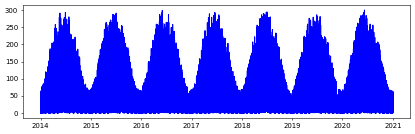

In [23]:
plt.figure(figsize=(10,3), dpi=50)
plt.plot(tdf_sat_hourly['Date'],tdf_sat_hourly['Val'],color='blue')

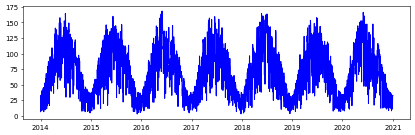

In [24]:
plt.figure(figsize=(10,3), dpi=50)
plt.plot(tdf_land_daily['Date'],tdf_land_daily['Val'],color='blue')

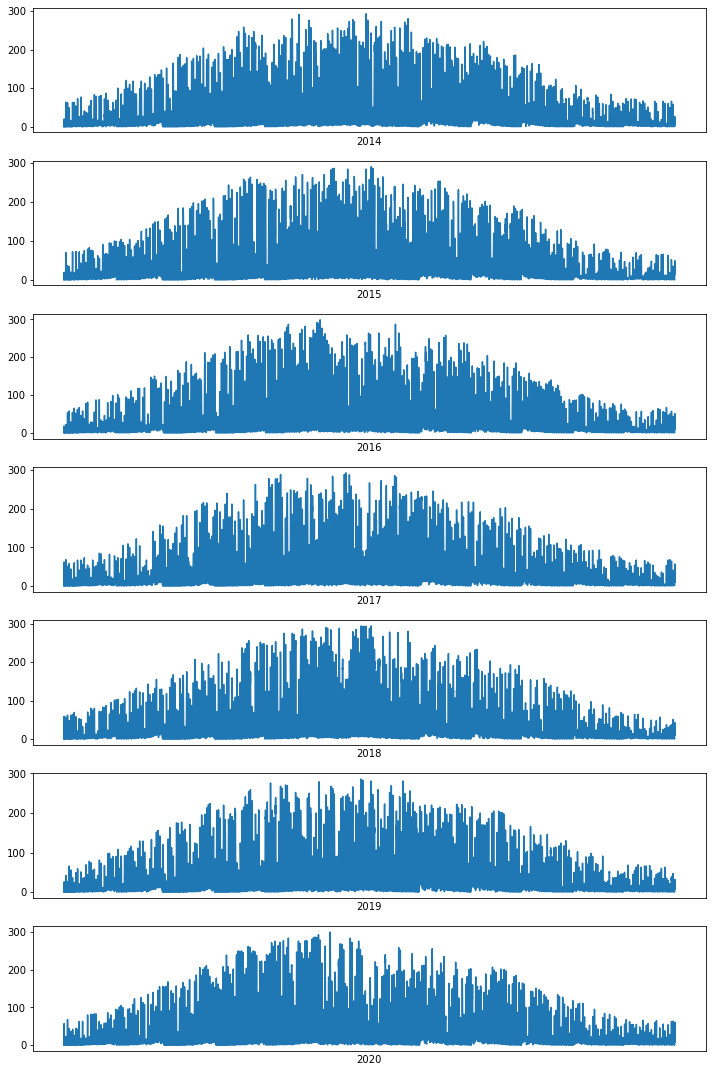

In [25]:
years = tdf_sat_hourly.Year.unique()
fig, axs = plt.subplots(len(years), figsize=(10,15), facecolor='w', edgecolor='k')
for i in range(len(years)):
    ax = axs[i]
    ax.plot((tdf_sat_hourly[tdf_sat_hourly.Year==years[i]]['Date']),(tdf_sat_hourly[tdf_sat_hourly.Year==years[i]]['Val']))
    ax.set_xlabel(years[i])     
    #ax.set_title(years[i])
    ax.set_xticks([])
plt.tight_layout()

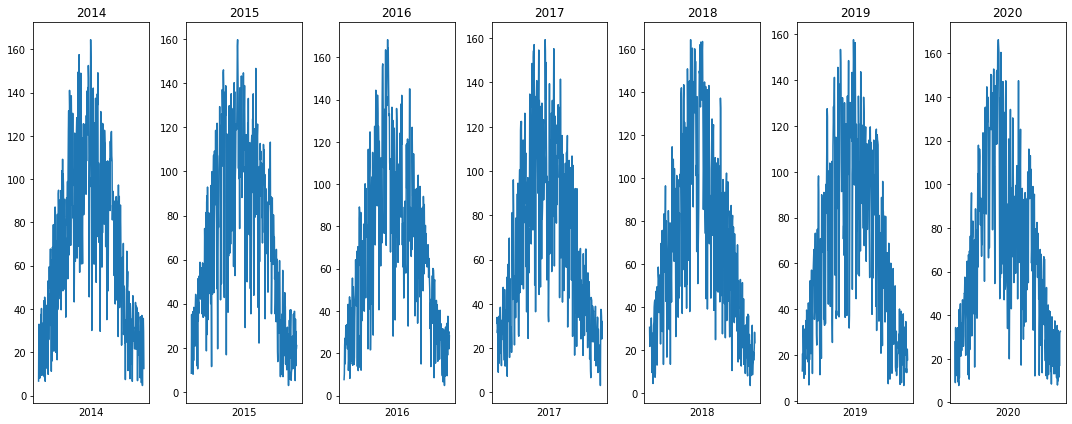

In [26]:
years = tdf_land_daily.Year.unique()
fig, axs = plt.subplots(1,len(years), figsize=(15, 6), facecolor='w', edgecolor='k')
for i in range(len(years)):
    ax = axs[i]
    ax.plot((tdf_land_daily[tdf_land_daily.Year==years[i]]['Date']),(tdf_land_daily[tdf_land_daily.Year==years[i]]['Val']))
    ax.set_xlabel(years[i])     
    ax.set_title(years[i])
    ax.set_xticks([])
plt.tight_layout()

In [27]:
tdf_sat_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32633 entries, 7 to 61358
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    32633 non-null  int64         
 1   Month   32633 non-null  int64         
 2   Day     32633 non-null  int64         
 3   Hour    32633 non-null  int64         
 4   Val     32633 non-null  float64       
 5   Date    32633 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.8 MB


<AxesSubplot:>

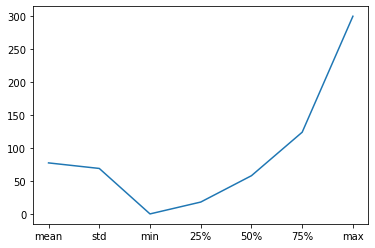

In [28]:
tdf_sat_hourly['Val'].describe().T.drop('count').plot()

In [29]:
np.median(tdf_sat_hourly['Val'])

58.0

In [30]:
np.mean(tdf_sat_hourly['Val'])

77.43204731406858

In [31]:
tdf_sat_hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,32633.0,2017.000613,2.000184,2014.0,2015.0,2017.0,2019.0,2020.0
Month,32633.0,6.364141,3.066517,1.0,4.0,6.0,9.0,12.0
Day,32633.0,15.744124,8.806877,1.0,8.0,16.0,23.0,31.0
Hour,32633.0,10.950541,3.999288,3.0,8.0,11.0,14.0,19.0
Val,32633.0,77.432047,69.008033,0.0,18.0,58.0,124.0,300.0


In [32]:
tdf_sat_hourly.to_csv('t1_sat.csv')
tdf_land_daily.to_csv('t2_sat.csv')

## start from here

In [7]:
#plt.style.use('bmh')

In [33]:
tdf_sat_hourly = pd.read_csv('t1_sat.csv')
tdf_land_daily = pd.read_csv('t2_sat.csv')

<AxesSubplot:xlabel='Hour'>

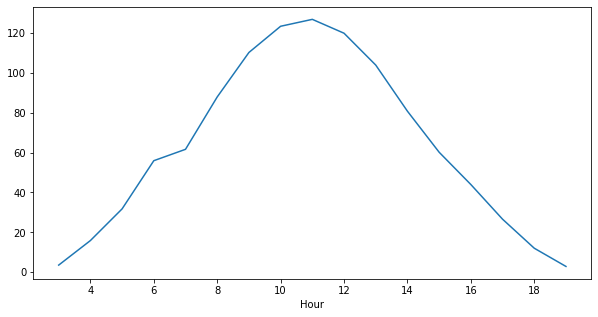

In [34]:
tdf_sat_hourly.groupby('Hour')['Val'].mean().plot(figsize = (10,5))


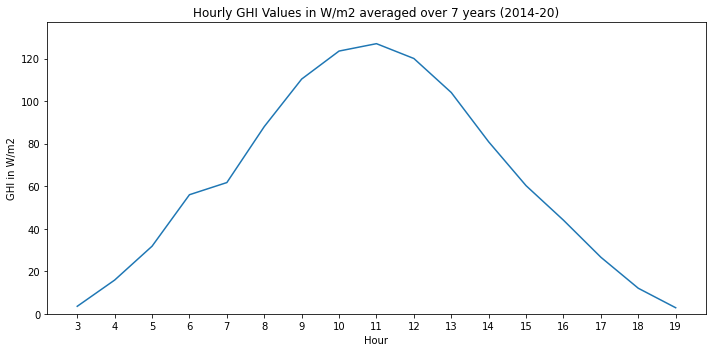

In [35]:
tdf_sat_hourly.groupby('Hour')['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.ylim([0, max(tdf_sat_hourly.groupby('Hour')['Val'].mean()) + 10])
_ = plt.xticks(tdf_sat_hourly['Hour'].unique())
_ = plt.title('Hourly GHI Values in W/m2 averaged over 7 years (2014-20)')


plt.tight_layout()
#plt.savefig('plots/p5.pdf')

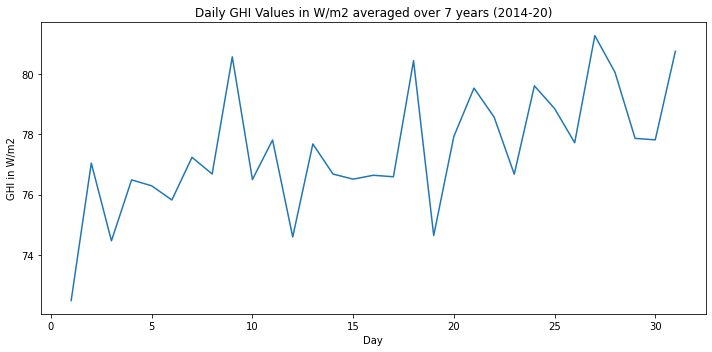

In [36]:
tdf_sat_hourly.groupby('Day')['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('Daily GHI Values in W/m2 averaged over 7 years (2014-20)')


plt.tight_layout()
plt.savefig('plots/p6.pdf')

<AxesSubplot:xlabel='Day,Hour'>

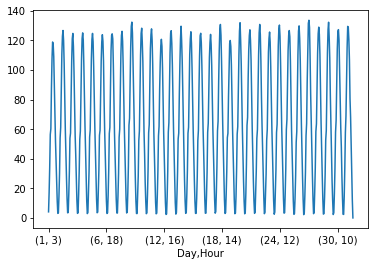

In [37]:
tdf_sat_hourly.groupby(['Day','Hour'])['Val'].mean().plot()

In [38]:
import statsmodels.api as sm


In [39]:
look67 = tdf_sat_hourly.groupby(['Day','Hour'])['Val'].mean().reset_index().copy()

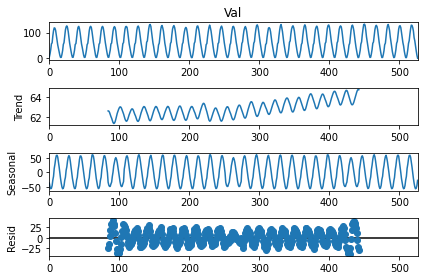

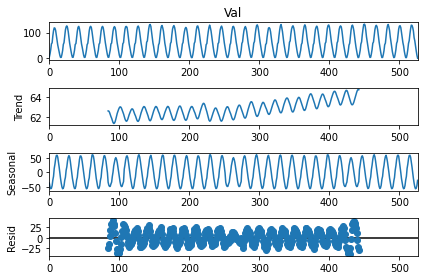

In [40]:
decomp = sm.tsa.seasonal_decompose(look67['Val'],period=24*7)
decomp.plot()

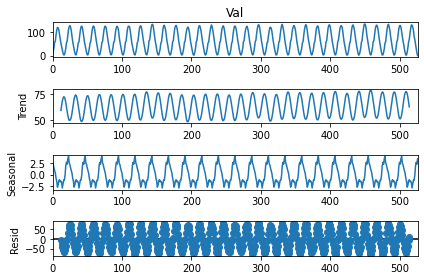

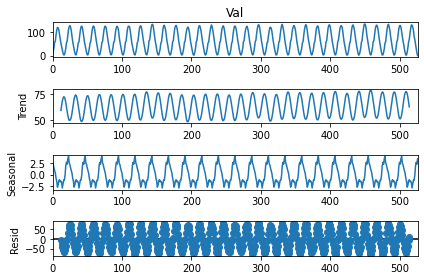

In [41]:
decomp = sm.tsa.seasonal_decompose(look67['Val'],period=24)

decomp.plot()

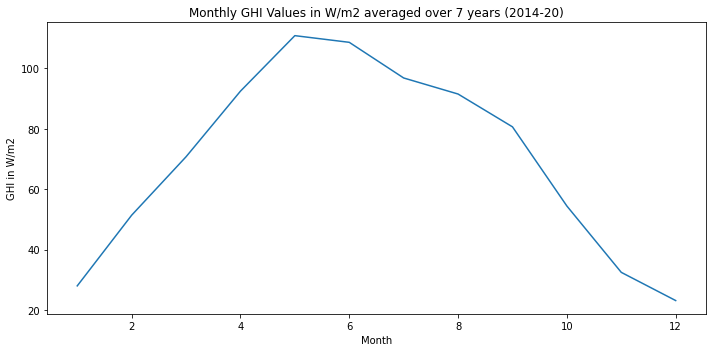

In [43]:
tdf_sat_hourly.groupby('Month')['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('Monthly GHI Values in W/m2 averaged over 7 years (2014-20)')


plt.tight_layout()
plt.savefig('plots/p7.pdf')

In [207]:
#plt.style.use('bmh')

In [18]:
#sns.set_style("whitegrid")


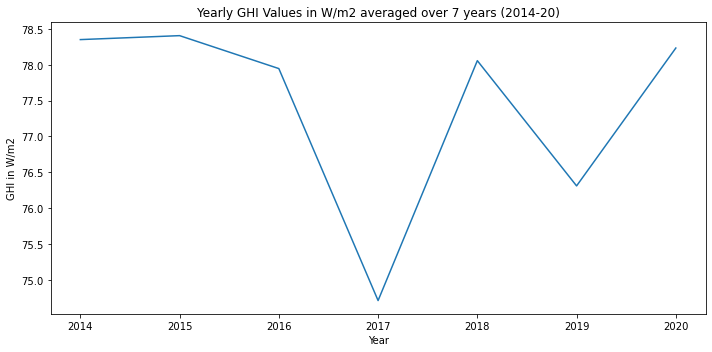

In [44]:
tdf_sat_hourly.groupby('Year')['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('Yearly GHI Values in W/m2 averaged over 7 years (2014-20)')


plt.tight_layout()
plt.savefig('plots/p8.pdf')


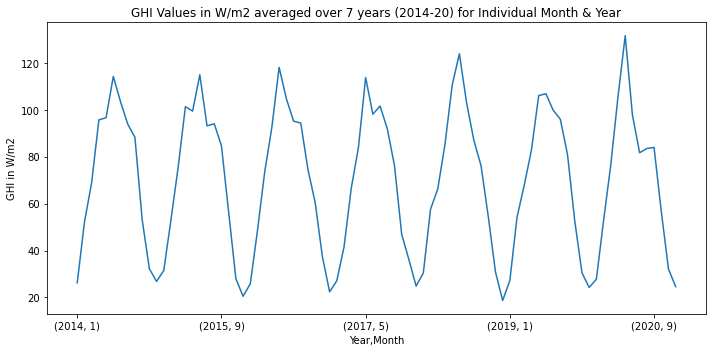

In [45]:
tdf_sat_hourly.groupby(['Year','Month'])['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('GHI Values in W/m2 averaged over 7 years (2014-20) for Individual Month & Year')


plt.tight_layout()
plt.savefig('plots/p9.pdf')


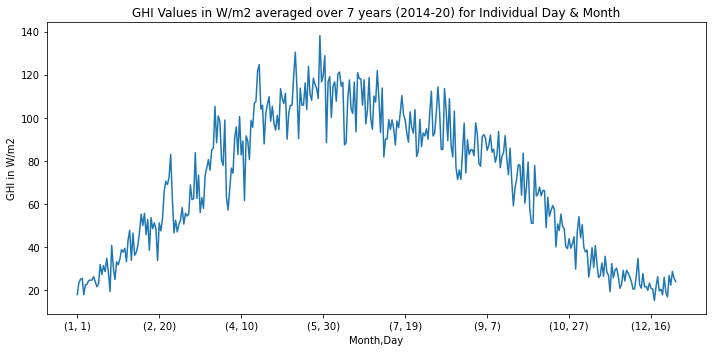

In [46]:
tdf_sat_hourly.groupby(['Month','Day'])['Val'].mean().plot(figsize = (10,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('GHI Values in W/m2 averaged over 7 years (2014-20) for Individual Day & Month')

plt.tight_layout()
plt.savefig('plots/p10.pdf')

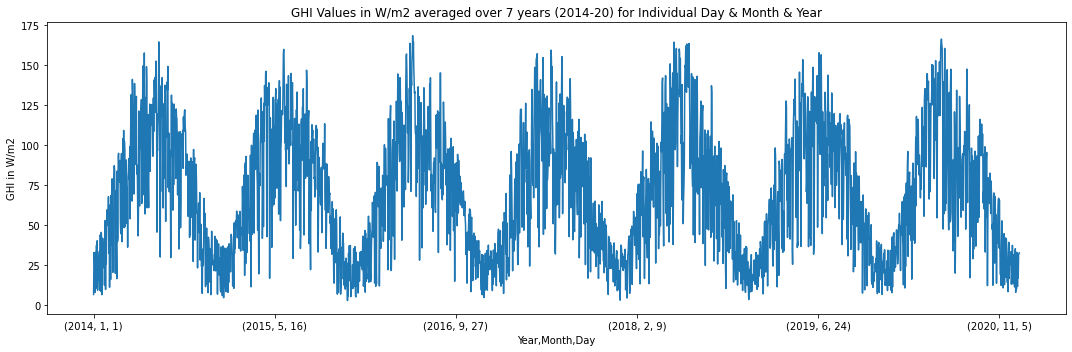

In [47]:
tdf_sat_hourly.groupby(['Year','Month','Day'])['Val'].mean().plot(figsize = (15,5))
_ = plt.ylabel('GHI in W/m2')
_ = plt.title('GHI Values in W/m2 averaged over 7 years (2014-20) for Individual Day & Month & Year')

plt.tight_layout()
plt.savefig('plots/p11.pdf')

## plot monthly avg across years

In [48]:
df1 = tdf_sat_hourly.groupby(['Year','Month'])['Val'].mean()
df1 = pd.DataFrame(df1)

In [49]:
df1un = df1.unstack(level = 'Month')
df1un.head()

Val                                                            \
Month         1          2          3           4           5           6    
Year                                                                         
2014   26.229391  52.071429  69.002481   95.684444   96.620968  114.178431   
2015   31.483871  53.132143  75.602978  101.322222   99.417339  114.888235   
2016   25.824373  48.572414  73.498759   92.686667  118.070565  104.760784   
2017   27.125448  41.485714  66.481390   83.906667  113.727823   98.105882   
2018   30.440860  57.607143  66.208437   85.162222  110.431452  123.856863   

                                                                          
Month          7          8          9          10         11         12  
Year                                                                      
2014   103.453510  93.881720  88.261538  53.281525  32.248148  26.826613  
2015    93.125237  94.012903  84.635897  56.381232  28.018519  20.491935  
2016    95.151803  94.320430  74.502564  60.436950  37.418519  22.403226  
2017   101.578748  91.905376  76.205128  46.914956  36.107407  24.834677  
2018   102.946869  87.083871  76.194872  54.692082  30.966667  18.677419

In [50]:
df1un.reset_index(inplace = True)

In [51]:
melt = pd.melt(df1un, id_vars='Year', value_name='Avg. monthly GHI W/m2')
melt.head()

,Year,NaN,Month,Avg. monthly GHI W/m2
0,2014,Val,1,26.229391
1,2015,Val,1,31.483871
2,2016,Val,1,25.824373
3,2017,Val,1,27.125448
4,2018,Val,1,30.440860


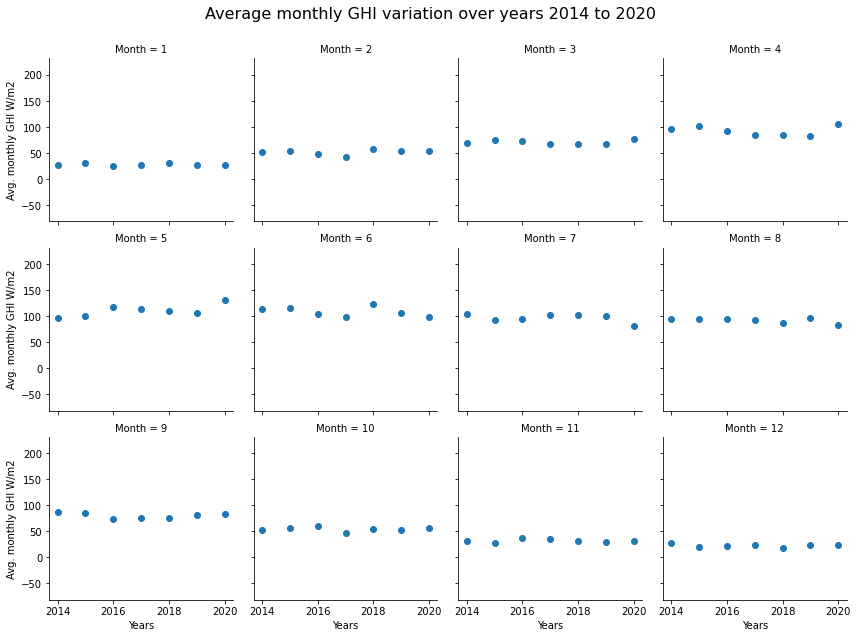

In [52]:
g = sns.FacetGrid(melt, col="Month", margin_titles = True, col_wrap = 4)
g.map(plt.scatter, "Year", "Avg. monthly GHI W/m2");
g.set_axis_labels("Years", "Avg. monthly GHI W/m2");
g.set(ylim=(melt['Avg. monthly GHI W/m2'].min() - 100, melt['Avg. monthly GHI W/m2'].max() + 100));
_ = plt.subplots_adjust(top=0.9)
_ = g.fig.suptitle('Average monthly GHI variation over years 2014 to 2020', fontsize = 16 )


In [53]:
hour_weekday = tdf_sat_hourly.pivot_table(values='Val', index='Hour', columns = 'Day', aggfunc = 'mean')

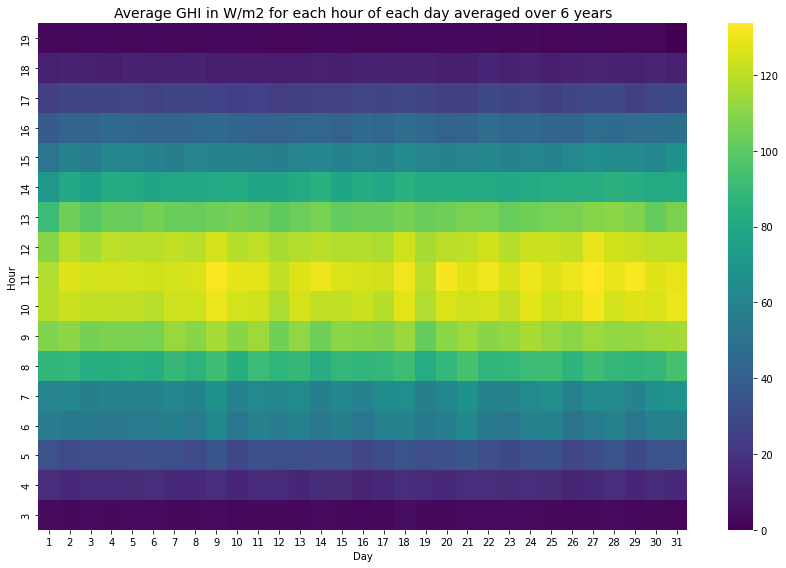

In [54]:
_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
_ = ax.set_title("Average GHI in W/m2 for each hour of each day averaged over 6 years", fontsize = 14)


plt.tight_layout()
plt.savefig('plots/p13.pdf')

In [55]:
tdf_sat_hourly['Val'].max()

300.0

c:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


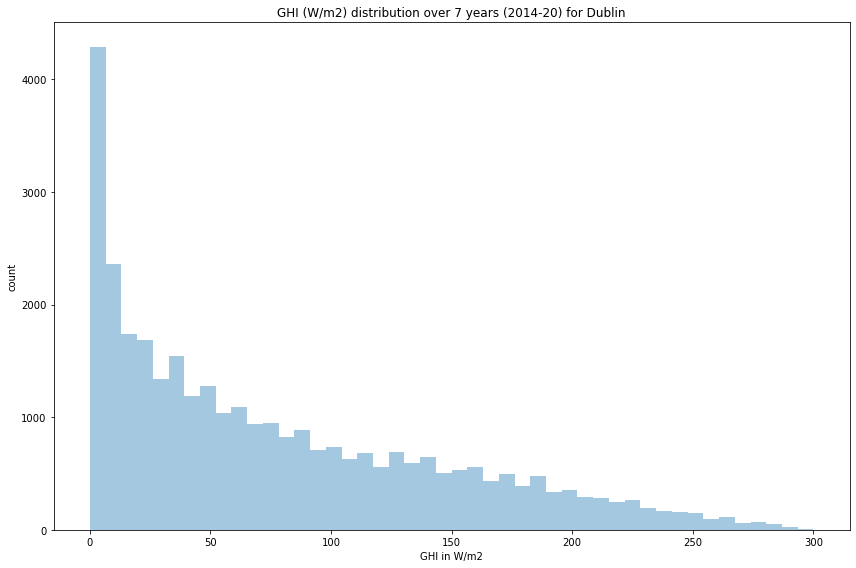

In [56]:
_ = plt.figure(figsize = (12,8))
_ = sns.distplot(tdf_sat_hourly['Val'], kde=False)
_ = plt.title('GHI (W/m2) distribution over 7 years (2014-20) for Dublin')
_ = plt.xlabel('GHI in W/m2')
_ = plt.ylabel('count')


plt.tight_layout()
plt.savefig('plots/p14.pdf')

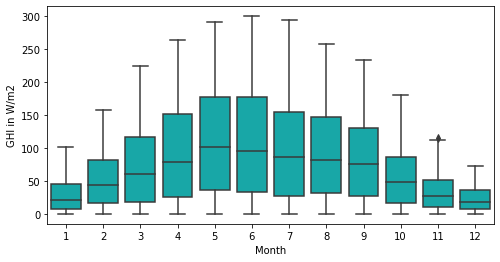

In [57]:
_ = plt.figure(figsize = (8,4))
_ = sns.boxplot(x = 'Month', y = 'Val', data = tdf_sat_hourly, color='c')
_ = plt.ylabel('GHI in W/m2')

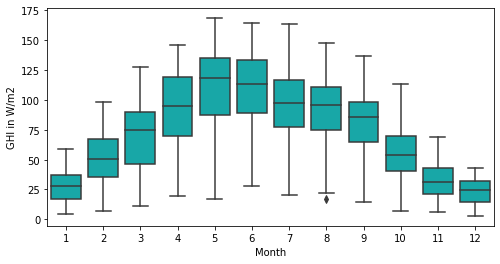

In [58]:
_ = plt.figure(figsize = (8,4))
_ = sns.boxplot(x = 'Month', y = 'Val', data = tdf_land_daily, color='c')
_ = plt.ylabel('GHI in W/m2')

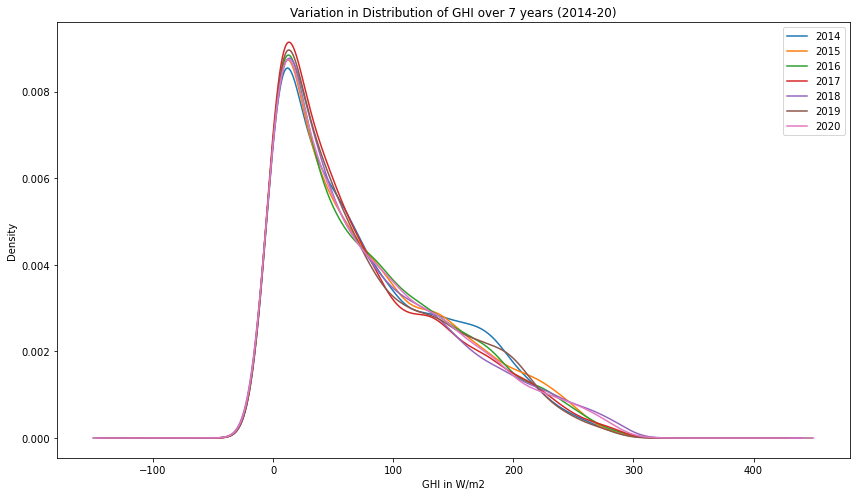

In [59]:
for year in tdf_sat_hourly['Year'].unique():
    tdf_sat_hourly[tdf_sat_hourly['Year'] == year]['Val'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('GHI in W/m2')
_ = plt.title('Variation in Distribution of GHI over 7 years (2014-20)')


plt.tight_layout()
plt.savefig('plots/p15.pdf')

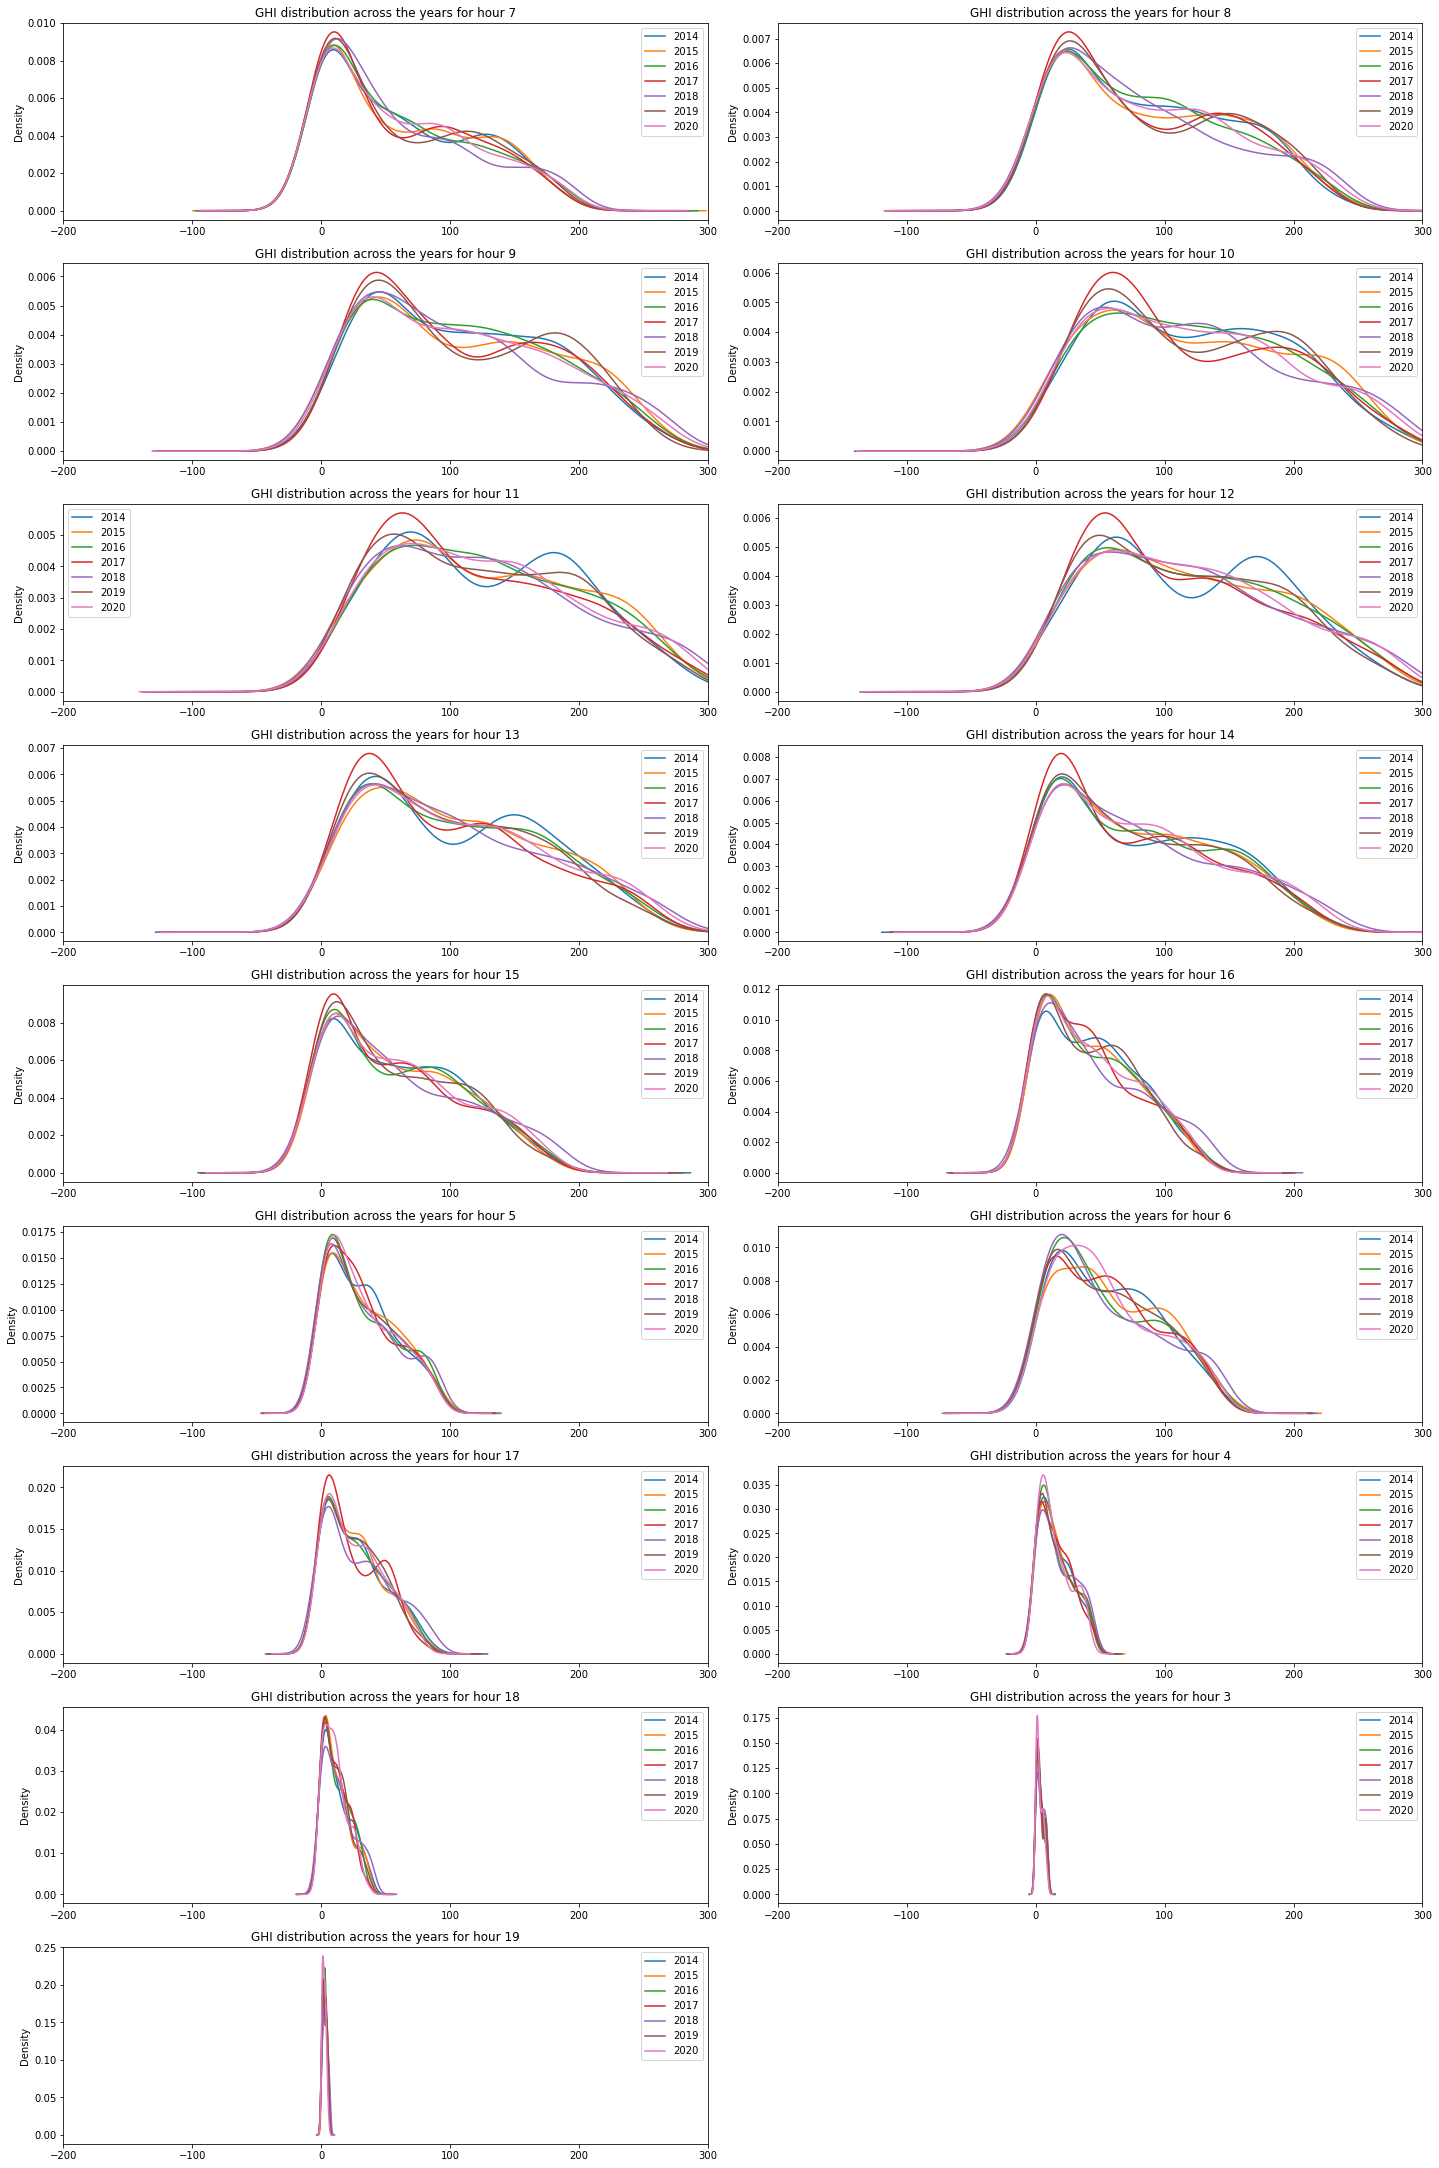

In [64]:
f = plt.figure(figsize = (20,40))
peak_hours = tdf_sat_hourly.Hour.unique()
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(tdf_sat_hourly['Year'].unique()):
        tdf_sat_hourly[(tdf_sat_hourly['Year'] == year) & (tdf_sat_hourly['Hour'] == hour)]['Val'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('GHI distribution across the years for hour '+str(hour))
    plt.xlim(np.min(tdf_sat_hourly.Val.values)-200, np.max(tdf_sat_hourly.Val.values))
plt.tight_layout()
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=1)

### END

In [ ]:
tdf_land_daily = df_land_hourly.copy()
tdf_land_daily['date'] = pd.to_datetime(tdf_land_daily[["Year", "Month", "Day"]])
tdf_land_daily.drop(tdf_land_daily.columns[[0,1, 2]], axis=1, inplace=True)
tdf_land_daily.reset_index(drop=True, inplace=True)

t_data_daily = tdf_land_daily['Val']
t_data_daily.index = tdf_land_daily['date']

plt.figure(figsize=(10,3), dpi=50)
plt.plot(t_data_daily,color='blue')

In [19]:
print(df_land_hourly.shape)
df_land_hourly.head()


(61368, 5)


,Year,Month,Day,Hour,Val
0,2014,1,1,0,0
1,2014,1,1,1,0
2,2014,1,1,2,0
3,2014,1,1,3,0
4,2014,1,1,4,0


In [10]:
print(df_land_full.shape)
df_land_full.head()


(2557, 4)


,Year,Month,Day,solar_diff
0,2014,1,1,7.291667
1,2014,1,2,28.958333
2,2014,1,3,19.916667
3,2014,1,4,33.458333
4,2014,1,5,20.125000


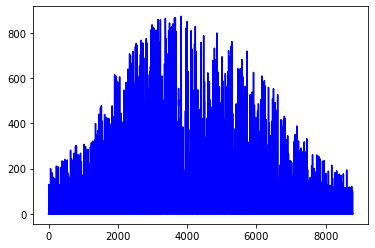

In [11]:
plt.plot(df_land['Val'],color='blue')

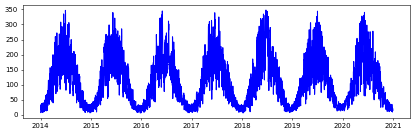

In [4]:
df = tdf_land_daily.copy()

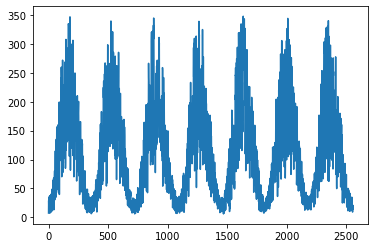

In [5]:
plt.plot(df['Val'])

In [6]:
t_data = t_data_daily

In [7]:
df = t_data

In [8]:
import pmdarima as pm

In [9]:
model = pm.auto_arima(t_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=30,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=26780.374, Time=6.52 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=27813.861, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=27377.401, Time=1.62 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=26837.755, Time=4.10 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=27811.861, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=26784.205, Time=0.66 sec
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=26781.552, Time=11.35 sec
 ARIMA(1,1,1)(0,0,2)[30] intercept   : AIC=26780.944, Time=30.40 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=26780.120, Time=8.54 sec
 ARIMA(1,1,1)(2,0,0)[30] intercept   : AIC=26781.102, Time=26.07 sec
 ARIMA(1,1,1)(2,0,1)[30] intercept   : AIC=26783.058, Time=32.29 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=26837.618, Time=2.72 sec
 ARIMA(2,1,1)(1,0,0)[30] intercept   : AIC=26781.355, Time=9.20 sec
 ARIMA(1,1,2)(1,0,0)[30] intercept   : AIC=26781.392, Time=9.61 sec
 

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2557
Model:             SARIMAX(0, 1, 2)x(1, 0, [], 30)   Log Likelihood              -13384.862
Date:                             Sun, 13 Mar 2022   AIC                          26777.724
Time:                                     16:48:34   BIC                          26801.109
Sample:                                          0   HQIC                         26786.204
                                            - 2557                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6937      0.015    -45.343      0.000      -0.724      -0.664
ma.L2         -0.1494      0.015    -10.013      0.000      -0.179      -0.120
ar.S.L30       0.0474      0.016      2.987      0.003       0.016       0.078
sigma2      2069.0749     47.769     43.314      0.000    1975.449    2162.701
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               124.12
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.08
Prob(H) (two-sided):                  0.47   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model = pm.auto_arima(t_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=31,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[31] intercept   : AIC=26786.087, Time=7.88 sec
 ARIMA(0,1,0)(0,0,0)[31] intercept   : AIC=27813.861, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[31] intercept   : AIC=27382.366, Time=2.00 sec
 ARIMA(0,1,1)(0,0,1)[31] intercept   : AIC=26840.927, Time=5.29 sec
 ARIMA(0,1,0)(0,0,0)[31]             : AIC=27811.861, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[31] intercept   : AIC=26784.205, Time=0.79 sec
 ARIMA(1,1,1)(1,0,0)[31] intercept   : AIC=26786.081, Time=7.98 sec
 ARIMA(1,1,1)(1,0,1)[31] intercept   : AIC=26787.423, Time=19.81 sec
 ARIMA(0,1,1)(0,0,0)[31] intercept   : AIC=26838.933, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[31] intercept   : AIC=27380.407, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[31] intercept   : AIC=26785.207, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[31] intercept   : AIC=26785.262, Time=1.04 sec
 ARIMA(0,1,2)(0,0,0)[31] intercept   : AIC=26783.422, Time=0.55 sec
 ARIMA(0,1,2)(1,0,0)[31] intercept   : AIC=26785.358, Time=5.16 sec
 ARI

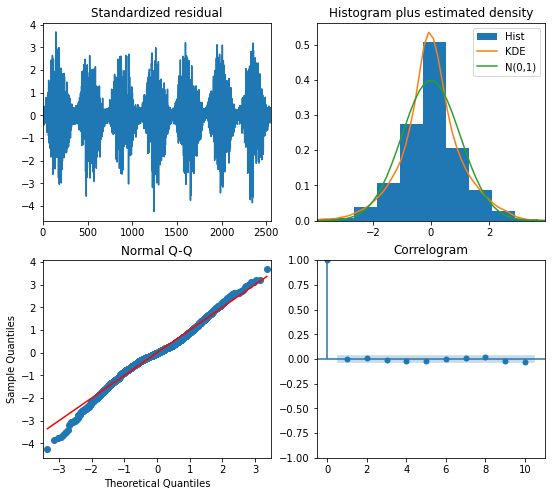

In [21]:
model.plot_diagnostics(figsize=(9,8))
plt.show()

## ARIMA MODEL

[Source](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

## How to find the order of differencing (d) in ARIMA model

The purpose of differencing it to make the time series stationary.

But you need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

So how to determine the right order of differencing?

In [9]:
tdf_land_daily

,Val,date
0,7.291667,2014-01-01
1,28.958333,2014-01-02
2,19.916667,2014-01-03
3,33.458333,2014-01-04
4,20.125000,2014-01-05
...,...,...
2552,21.208333,2020-12-27
2553,9.041667,2020-12-28
2554,20.958333,2020-12-29
2555,20.083333,2020-12-30


In [107]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.585424
p-value: 0.490911


In [108]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(tdf_land_daily.Val)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.585424
p-value: 0.490911


In [109]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_mean_land_full.Val.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.585424
p-value: 0.490911


In [22]:
plot_pacf(t_data.diff(2).dropna(),lags=300)

NameError: name 'plot_pacf' is not defined

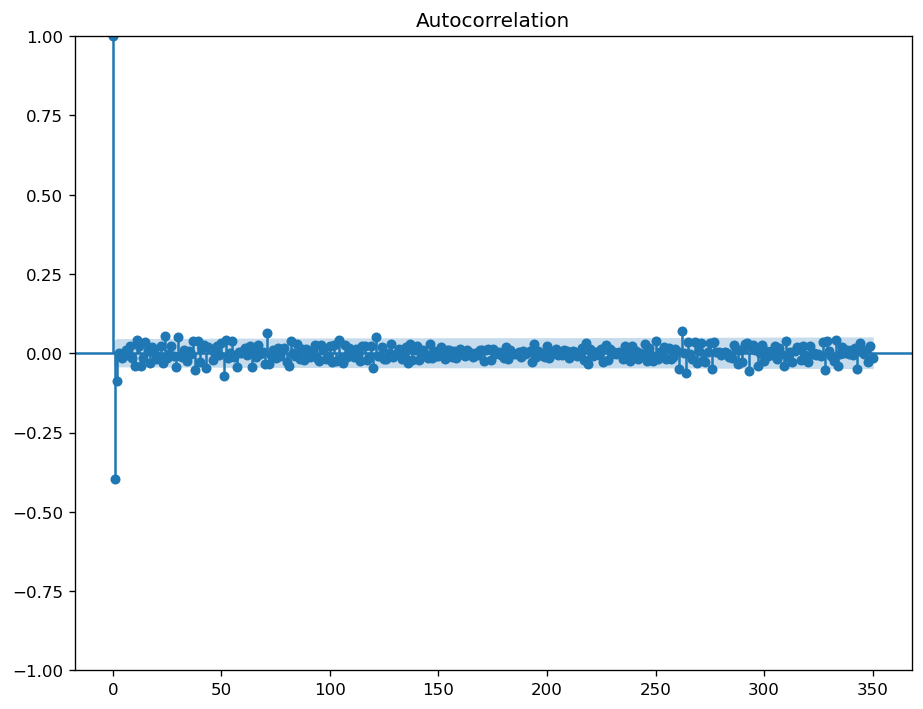

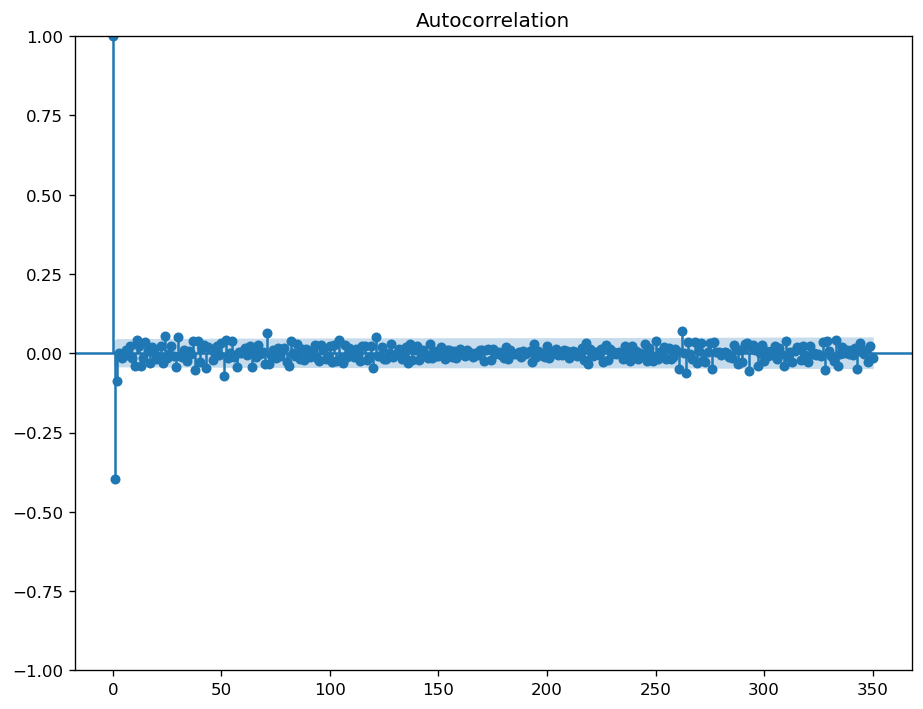

In [73]:
plot_acf(t_data.diff().dropna(),lags=n_lags)

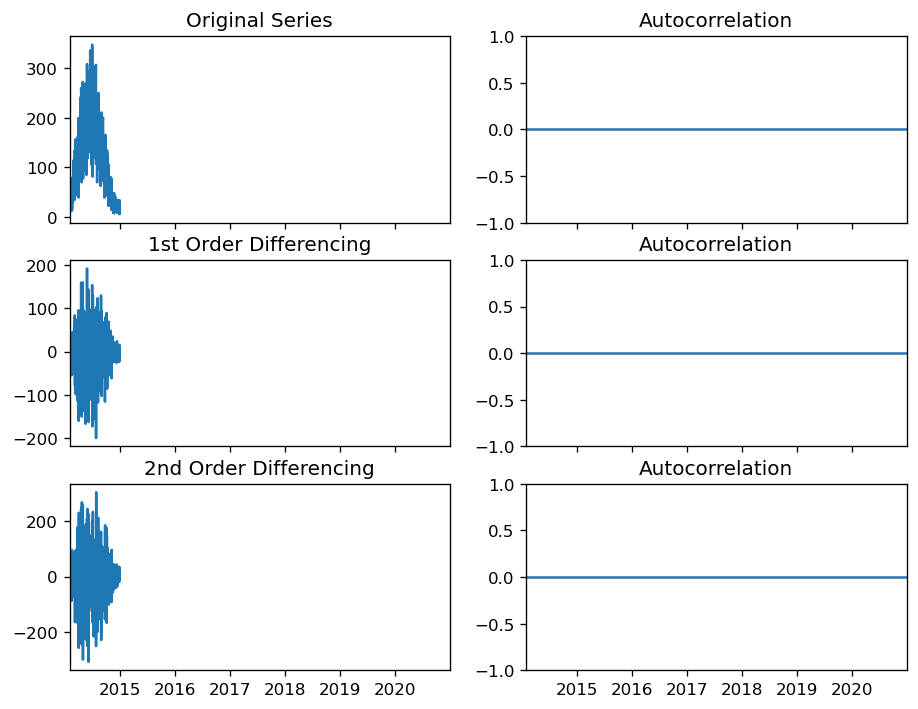

In [110]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
n_lags = 350

# Import data
df = tdf_land_daily
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(t_data); axes[0, 0].set_title('Original Series')
#axes[0,0].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
#axes[0,1].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
plot_acf(t_data,lags=n_lags, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(t_data.diff()); axes[1, 0].set_title('1st Order Differencing')
#axes[1,0].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
#axes[1,1].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
plot_acf(t_data.diff().dropna(),lags=n_lags, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(t_data.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
axes[2,0].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
#axes[2,1].set_xlim(dt.datetime(2014,1,31), dt.datetime(2020,12,31))
plot_acf(t_data.diff().diff().dropna(),lags=n_lags, ax=axes[2, 1])

plt.show()

In [54]:
t_data

date
2014-01-01     7.291667
2014-01-02    28.958333
2014-01-03    19.916667
2014-01-04    33.458333
2014-01-05    20.125000
                ...    
2020-12-27    21.208333
2020-12-28     9.041667
2020-12-29    20.958333
2020-12-30    20.083333
2020-12-31    14.250000
Name: Val, Length: 2557, dtype: float64

In [56]:
import datetime as dt

C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


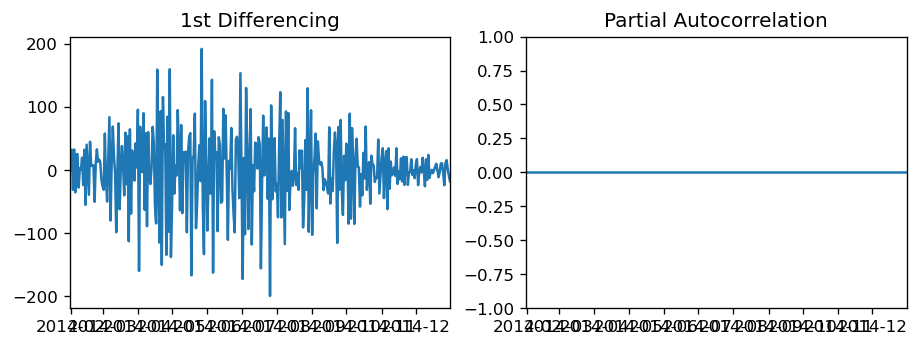

In [113]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(t_data.diff()); axes[0].set_title('1st Differencing')
axes[0].set_xlim(dt.datetime(2014,1,31), dt.datetime(2014,12,31))
axes[1].set(ylim=(0,5))
axes[1].set_xlim(dt.datetime(2014,1,31), dt.datetime(2014,12,31))
plot_pacf(t_data.diff().dropna(), ax=axes[1])

plt.show()

In [25]:
df = t_data
df

date
2014-01-01     7.291667
2014-01-02    28.958333
2014-01-03    19.916667
2014-01-04    33.458333
2014-01-05    20.125000
                ...    
2020-12-27    21.208333
2020-12-28     9.041667
2020-12-29    20.958333
2020-12-30    20.083333
2020-12-31    14.250000
Name: Val, Length: 2557, dtype: float64

In [114]:
from pmdarima.arima.utils import ndiffs

In [115]:
y = t_data
## Adf Test
ndiffs(y, test='adf')  # 2


1

In [116]:

# KPSS test
ndiffs(y, test='kpss')  # 0


1

In [117]:

# PP test:
ndiffs(y, test='pp')  # 2

0

## best fit ARIMA model

https://fish-forecast.github.io/Fish-Forecast-Bookdown/3-4-fitting-arima-models.html

## Trend & Seasonality

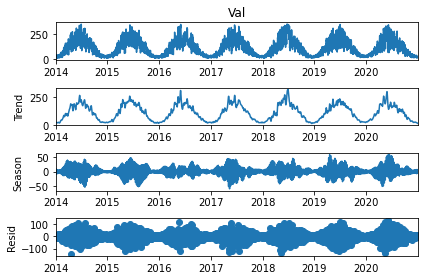

In [143]:
from statsmodels.tsa.seasonal import STL

stl = STL(t_data_daily, seasonal=11)
res = stl.fit()
fig = res.plot()

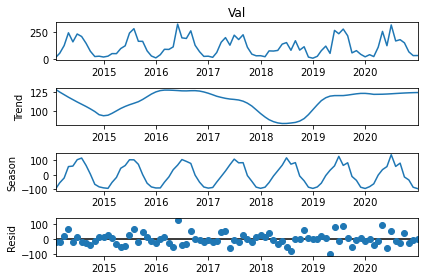

In [144]:
from statsmodels.tsa.seasonal import STL

stl = STL(t_data_monthly, seasonal=13)
res = stl.fit()
fig = res.plot()

In [88]:
df_mean_land_full['val 2'] = df_mean_land_full['Val'].diff(periods=1)
df_mean_land_full = df_mean_land_full.dropna()

df = df_mean_land_full[(df_mean_land_full.Year==2018)&
                    (df_mean_land_full.Month==8)]

df = df_mean_land_full[df_mean_land_full.Month==8]

In [61]:
df_mean_sat_full['val 2'] = df_mean_sat_full['Val'].diff(periods=1)
df_mean_sat_full = df_mean_sat_full.dropna()

df = df_mean_sat_full[(df_mean_sat_full.Year==2018)&
                    (df_mean_sat_full.Month==8)]

df = df_mean_sat_full[df_mean_sat_full.Month==5]

In [8]:
df.shape

NameError: name 'df' is not defined

In [114]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [129]:
t_data = t_data_daily

In [127]:
t_data = t_data_monthly

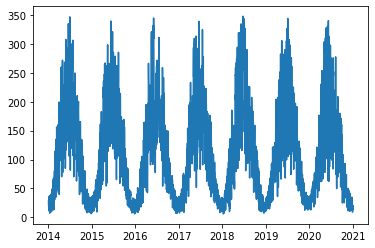

In [130]:
plt.plot(t_data)

In [131]:
t_data.shape

(2556,)

C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


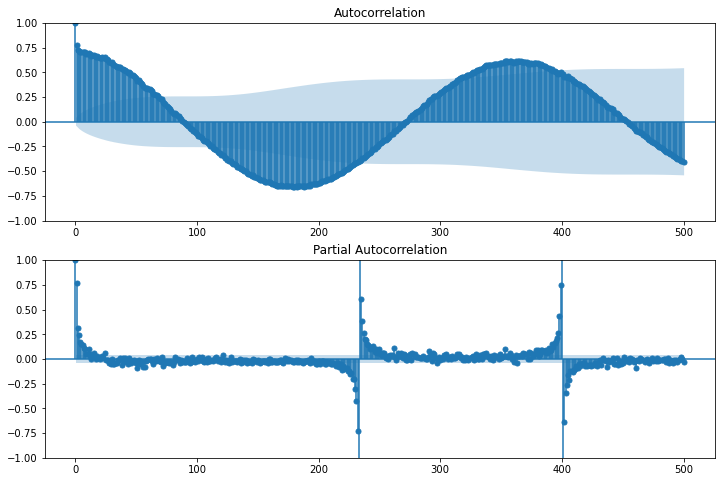

In [133]:
n_lags = 500
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t_data.values.squeeze(), lags=n_lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(t_data, lags=n_lags, ax=ax2)

In [19]:
arma_mod20 = ARIMA(t_data, order=(2, 0, 0)).fit()
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const      112.285894
ar.L1        0.527097
ar.L2        0.318491
sigma2    2478.170431
dtype: float64
27248.850721636256 27272.23708153742 27257.33135395117


In [20]:
arma_mod30 = ARIMA(t_data, order=(3, 0, 0)).fit()
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\ydjoe\anaconda3\envs\geom_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const      112.285838
ar.L1        0.448544
ar.L2        0.188640
ar.L3        0.246663
sigma2    2328.037589
dtype: float64
27090.351889098056 27119.58483897451 27100.952679491696


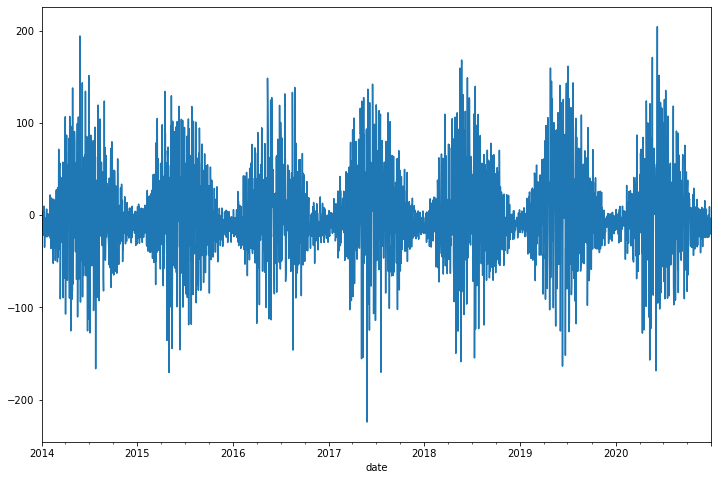

In [21]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [22]:
resid = arma_mod30.resid

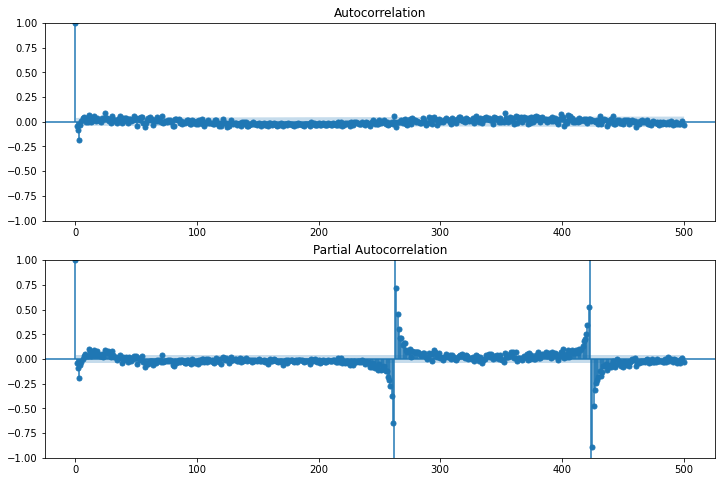

In [24]:
n_lags = 500
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=n_lags, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=n_lags, ax=ax2)

In [26]:
predict_sunspots = arma_mod30.predict("2019", "2020", dynamic=True)
print(predict_sunspots)

2019-01-01     31.040610
2019-01-02     38.287390
2019-01-03     40.151647
2019-01-04     45.931229
2019-01-05     50.662812
                 ...    
2020-12-27    112.285838
2020-12-28    112.285838
2020-12-29    112.285838
2020-12-30    112.285838
2020-12-31    112.285838
Freq: D, Name: predicted_mean, Length: 731, dtype: float64


In [27]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

In [28]:
mean_forecast_err(t_data, predict_sunspots)

2.3019976271378892

In [35]:
print(sm.tsa.adfuller(t_data)[1])

0.03335834089856555


Interpreting Ljung -Box test results from statsmodels.stats.diagnostic.acorr_ljungbox function (python)

https://stats.stackexchange.com/questions/200267/interpreting-ljung-box-test-results-from-statsmodels-stats-diagnostic-acorr-lju

How to Perform a Ljung-Box Test in Python

https://www.statology.org/ljung-box-test-python/

statsmodels 

https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

ljung-box-test

https://www.statisticshowto.com/ljung-box-test/

Comparative Study of Univariate and Multivariate Long Short-Term Memory for Very Short-Term Forecasting of Global Horizontal Irradiance

https://www.mdpi.com/2073-8994/13/8/1544/htm

White Noise Time Series with Python


https://machinelearningmastery.com/white-noise-time-series-python/

Ljung-Box Statistics for ARIMA residuals in R: confusing test results

https://stats.stackexchange.com/questions/64711/ljung-box-statistics-for-arima-residuals-in-r-confusing-test-results

Help with the Ljung-Box test for time independence of residuals

https://stats.stackexchange.com/questions/31159/help-with-the-ljung-box-test-for-time-independence-of-residuals

statistical-test-for-time-series

https://towardsdatascience.com/statistical-test-for-time-series-a57d9155d09b